In [171]:
import sklearn
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#no wrapping
pd.set_option('display.max_colwidth', None)
pd.set_option('display.width', 1000)
pd.set_option('display.expand_frame_repr', False)  # Disable line-wrapping

coffea_caff = pd.read_csv(r"..\data\coll_caff_node_w_class.csv")
#coffea_caff_clim = pd.read_csv(r"..\data\coll_caff_node_clim_w_class.csv")
#coffea_caff_env = pd.read_csv(r"..\data\coll_caff_node_env_w_class.csv")

coffee_data = coffea_caff.copy()

#distinct_vals = coffee_data['caffeine_class'].value_counts()
#print(distinct_vals)

coffee_data.drop(columns=['specimen_id','longitude','latitude', 'source_crs', 'mada_geom_point', 'sampled_layers', 'nodata_layers', 'is_categorical_encoded'],inplace=True)

coffee_data.head

<bound method NDFrame.head of      clim_1_tmin1_Monthly minimum temperature - January (°C x 10)  clim_2_tmin2_Monthly minimum temperature - February (°C x 10)  clim_3_tmin3_Monthly minimum temperature - March (°C x 10)  clim_4_tmin4_Monthly minimum temperature - April (°C x 10)  clim_5_tmin5_Monthly minimum temperature - May (°C x 10)  clim_6_tmin6_Monthly minimum temperature - June (°C x 10)  clim_7_tmin7_Monthly minimum temperature - July (°C x 10)  clim_8_tmin8_Monthly minimum temperature - August (°C x 10)  clim_9_tmin9_Monthly minimum temperature - September (°C x 10)  clim_10_tmin10_Monthly minimum temperature - October (°C x 10)  ...  env_78_wat_Watersheds_RetDisp_Manampatrana  env_78_wat_Watersheds_RetDisp_Mananara_du_Sud  env_78_wat_Watersheds_RetDisp_Mandrare  env_78_wat_Watersheds_RetDisp_Mangoky  env_78_wat_Watersheds_RetDisp_Mangoro  env_78_wat_Watersheds_RetDisp_Onilahy  env_78_wat_Watersheds_RetDisp_Sambirano  env_78_wat_Watersheds_RetDisp_Tsiribihina  env_78_wat_Watersh

In [172]:
#headers = coffee_data.columns
#headers.to_series().to_csv(r'../data/column_headers_bin.csv', index=False, header=False)


In [173]:

coffee_data.columns = (coffee_data.columns
              .str.replace(r'[^\w\s]', '', regex=True)  # Remove special characters like °, parentheses, hyphen
              .str.replace(r'\s+', '_', regex=True)     # Replace spaces with underscores
              .str.strip())                             # Strip leading and trailing spaces


mapping_df = pd.read_csv(r'../data/column_mapping.csv')

mapping_df['old_name'] = (mapping_df['old_name']
                          .str.replace(r'[^\w\s]', '', regex=True)  # Clean the old names similarly
                          .str.replace(r'\s+', '_', regex=True)     # Replace spaces with underscores
                          .str.strip())
mapping_df

# Create the mapping dictionary
mapping_dict = dict(zip(mapping_df['old_name'], mapping_df['new_name']))

# Rename columns in the DataFrame using the cleaned mapping
coffee_data.rename(columns=mapping_dict, inplace=True)
coffee_data.columns

Index(['clim_1_tmin1_jan', 'clim_2_tmin2_feb', 'clim_3_tmin3_mar', 'clim_4_tmin4_apr', 'clim_5_tmin5_may', 'clim_6_tmin6_jun', 'clim_7_tmin7_jul', 'clim_8_tmin8_aug', 'clim_9_tmin9_sep', 'clim_10_tmin10_oct',
       ...
       'env_78_wat_16', 'env_78_wat_17', 'env_78_wat_1', 'env_78_wat_18', 'env_78_wat_15', 'env_78_wat_19', 'env_78_wat_24', 'env_78_wat_21', 'env_78_wat_0', 'caffeine_class'], dtype='object', length=159)

In [37]:
pd.set_option('display.max_rows', None)


In [174]:
missing_data = coffee_data.isnull().sum()
missing_data

clim_1_tmin1_jan            11
clim_2_tmin2_feb            11
clim_3_tmin3_mar            11
clim_4_tmin4_apr            11
clim_5_tmin5_may            11
clim_6_tmin6_jun            11
clim_7_tmin7_jul            11
clim_8_tmin8_aug            11
clim_9_tmin9_sep            11
clim_10_tmin10_oct          11
clim_11_tmin11_nov          11
clim_12_tmin12_dec          11
clim_13_tmax1_jan           11
clim_14_tmax2_feb           11
clim_15_tmax3_mar           11
clim_16_tmax4_apr           11
clim_17_tmax5_may           11
clim_18_tmax6_jun           11
clim_19_tmax7_jul           11
clim_20_tmax8_aug           11
clim_21_tmax9_sep           11
clim_22_tmax10_oct          11
clim_23_tmax11_nov          11
clim_24_tmax12_dec          11
clim_25_prec1_jan           11
clim_26_prec2_feb           11
clim_27_prec3_mar           11
clim_28_prec4_apr           11
clim_29_prec5_may           11
clim_30_prec6_jun           11
clim_31_prec7_jul           11
clim_32_prec8_aug           11
clim_33_

In [175]:
cleaned_data = coffee_data.dropna()
coffee_data = cleaned_data.copy()
coffee_data.isnull().sum()

clim_1_tmin1_jan            0
clim_2_tmin2_feb            0
clim_3_tmin3_mar            0
clim_4_tmin4_apr            0
clim_5_tmin5_may            0
clim_6_tmin6_jun            0
clim_7_tmin7_jul            0
clim_8_tmin8_aug            0
clim_9_tmin9_sep            0
clim_10_tmin10_oct          0
clim_11_tmin11_nov          0
clim_12_tmin12_dec          0
clim_13_tmax1_jan           0
clim_14_tmax2_feb           0
clim_15_tmax3_mar           0
clim_16_tmax4_apr           0
clim_17_tmax5_may           0
clim_18_tmax6_jun           0
clim_19_tmax7_jul           0
clim_20_tmax8_aug           0
clim_21_tmax9_sep           0
clim_22_tmax10_oct          0
clim_23_tmax11_nov          0
clim_24_tmax12_dec          0
clim_25_prec1_jan           0
clim_26_prec2_feb           0
clim_27_prec3_mar           0
clim_28_prec4_apr           0
clim_29_prec5_may           0
clim_30_prec6_jun           0
clim_31_prec7_jul           0
clim_32_prec8_aug           0
clim_33_prec9_sep           0
clim_34_pr

First Pass of *Random Forest cliassifier* Without Removing Correlated Features

In [213]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Assuming 'caffeine_class' is your target variable and X contains the features
X = coffee_data.drop(columns=['caffeine_class'])  # Replace with actual feature columns
y = coffee_data['caffeine_class']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)#criterion='entropy',
rf_classifier.fit(X_train, y_train)

# Get feature importance scores
feature_importances = rf_classifier.feature_importances_

# Pair feature names with their importance scores
features = X.columns
important_features = sorted(zip(features, feature_importances), key=lambda x: x[1], reverse=True)
feature_importance_dict = {feature: importance for feature, importance in zip(X.columns, feature_importances)}

# Display the most important features
for feature, importance in important_features:
    print(f"Feature: {feature}, Importance: {importance:.4f}")



Feature: env_75_geo_10, Importance: 0.0458
Feature: clim_34_prec10_oct, Importance: 0.0257
Feature: clim_48_Annual_prec, Importance: 0.0235
Feature: clim_16_tmax4_apr, Importance: 0.0231
Feature: clim_2_tmin2_feb, Importance: 0.0227
Feature: clim_70_ndm_per_year, Importance: 0.0223
Feature: clim_56_pet1_jan, Importance: 0.0217
Feature: clim_60_pet5_may, Importance: 0.0201
Feature: clim_1_tmin1_jan, Importance: 0.0196
Feature: clim_25_prec1_jan, Importance: 0.0184
Feature: clim_52_prec_wettest_q, Importance: 0.0174
Feature: clim_27_prec3_mar, Importance: 0.0170
Feature: clim_9_tmin9_sep, Importance: 0.0167
Feature: clim_69_cwd_annual, Importance: 0.0166
Feature: env_78_wat_2, Importance: 0.0165
Feature: clim_53_prec_driest_q, Importance: 0.0164
Feature: clim_30_prec6_jun, Importance: 0.0164
Feature: clim_31_prec7_jul, Importance: 0.0159
Feature: env_71_alt, Importance: 0.0158
Feature: clim_28_prec4_apr, Importance: 0.0157
Feature: env_76_soi_10, Importance: 0.0156
Feature: clim_32_prec8

In [177]:
from sklearn.model_selection import cross_val_score

# Evaluate the model using cross-validation (e.g., accuracy)
scores = cross_val_score(rf_classifier, X_train, y_train, cv=5, scoring='accuracy')
print("Cross-Validation Accuracy: ", scores.mean())


c:\Users\adm1\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_split.py:776: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


Cross-Validation Accuracy:  0.9087624209575429


In [214]:
# Select the top 10 important features
top_n = 10
important_features = important_features[:top_n]

# Get the feature names only (without the importance score)
important_feature_names = [feature for feature, importance in important_features]

print("Top 10 Important Features:", important_feature_names)
important_feature_names

Top 10 Important Features: ['env_75_geo_10', 'clim_34_prec10_oct', 'clim_48_Annual_prec', 'clim_16_tmax4_apr', 'clim_2_tmin2_feb', 'clim_70_ndm_per_year', 'clim_56_pet1_jan', 'clim_60_pet5_may', 'clim_1_tmin1_jan', 'clim_25_prec1_jan']


['env_75_geo_10',
 'clim_34_prec10_oct',
 'clim_48_Annual_prec',
 'clim_16_tmax4_apr',
 'clim_2_tmin2_feb',
 'clim_70_ndm_per_year',
 'clim_56_pet1_jan',
 'clim_60_pet5_may',
 'clim_1_tmin1_jan',
 'clim_25_prec1_jan']

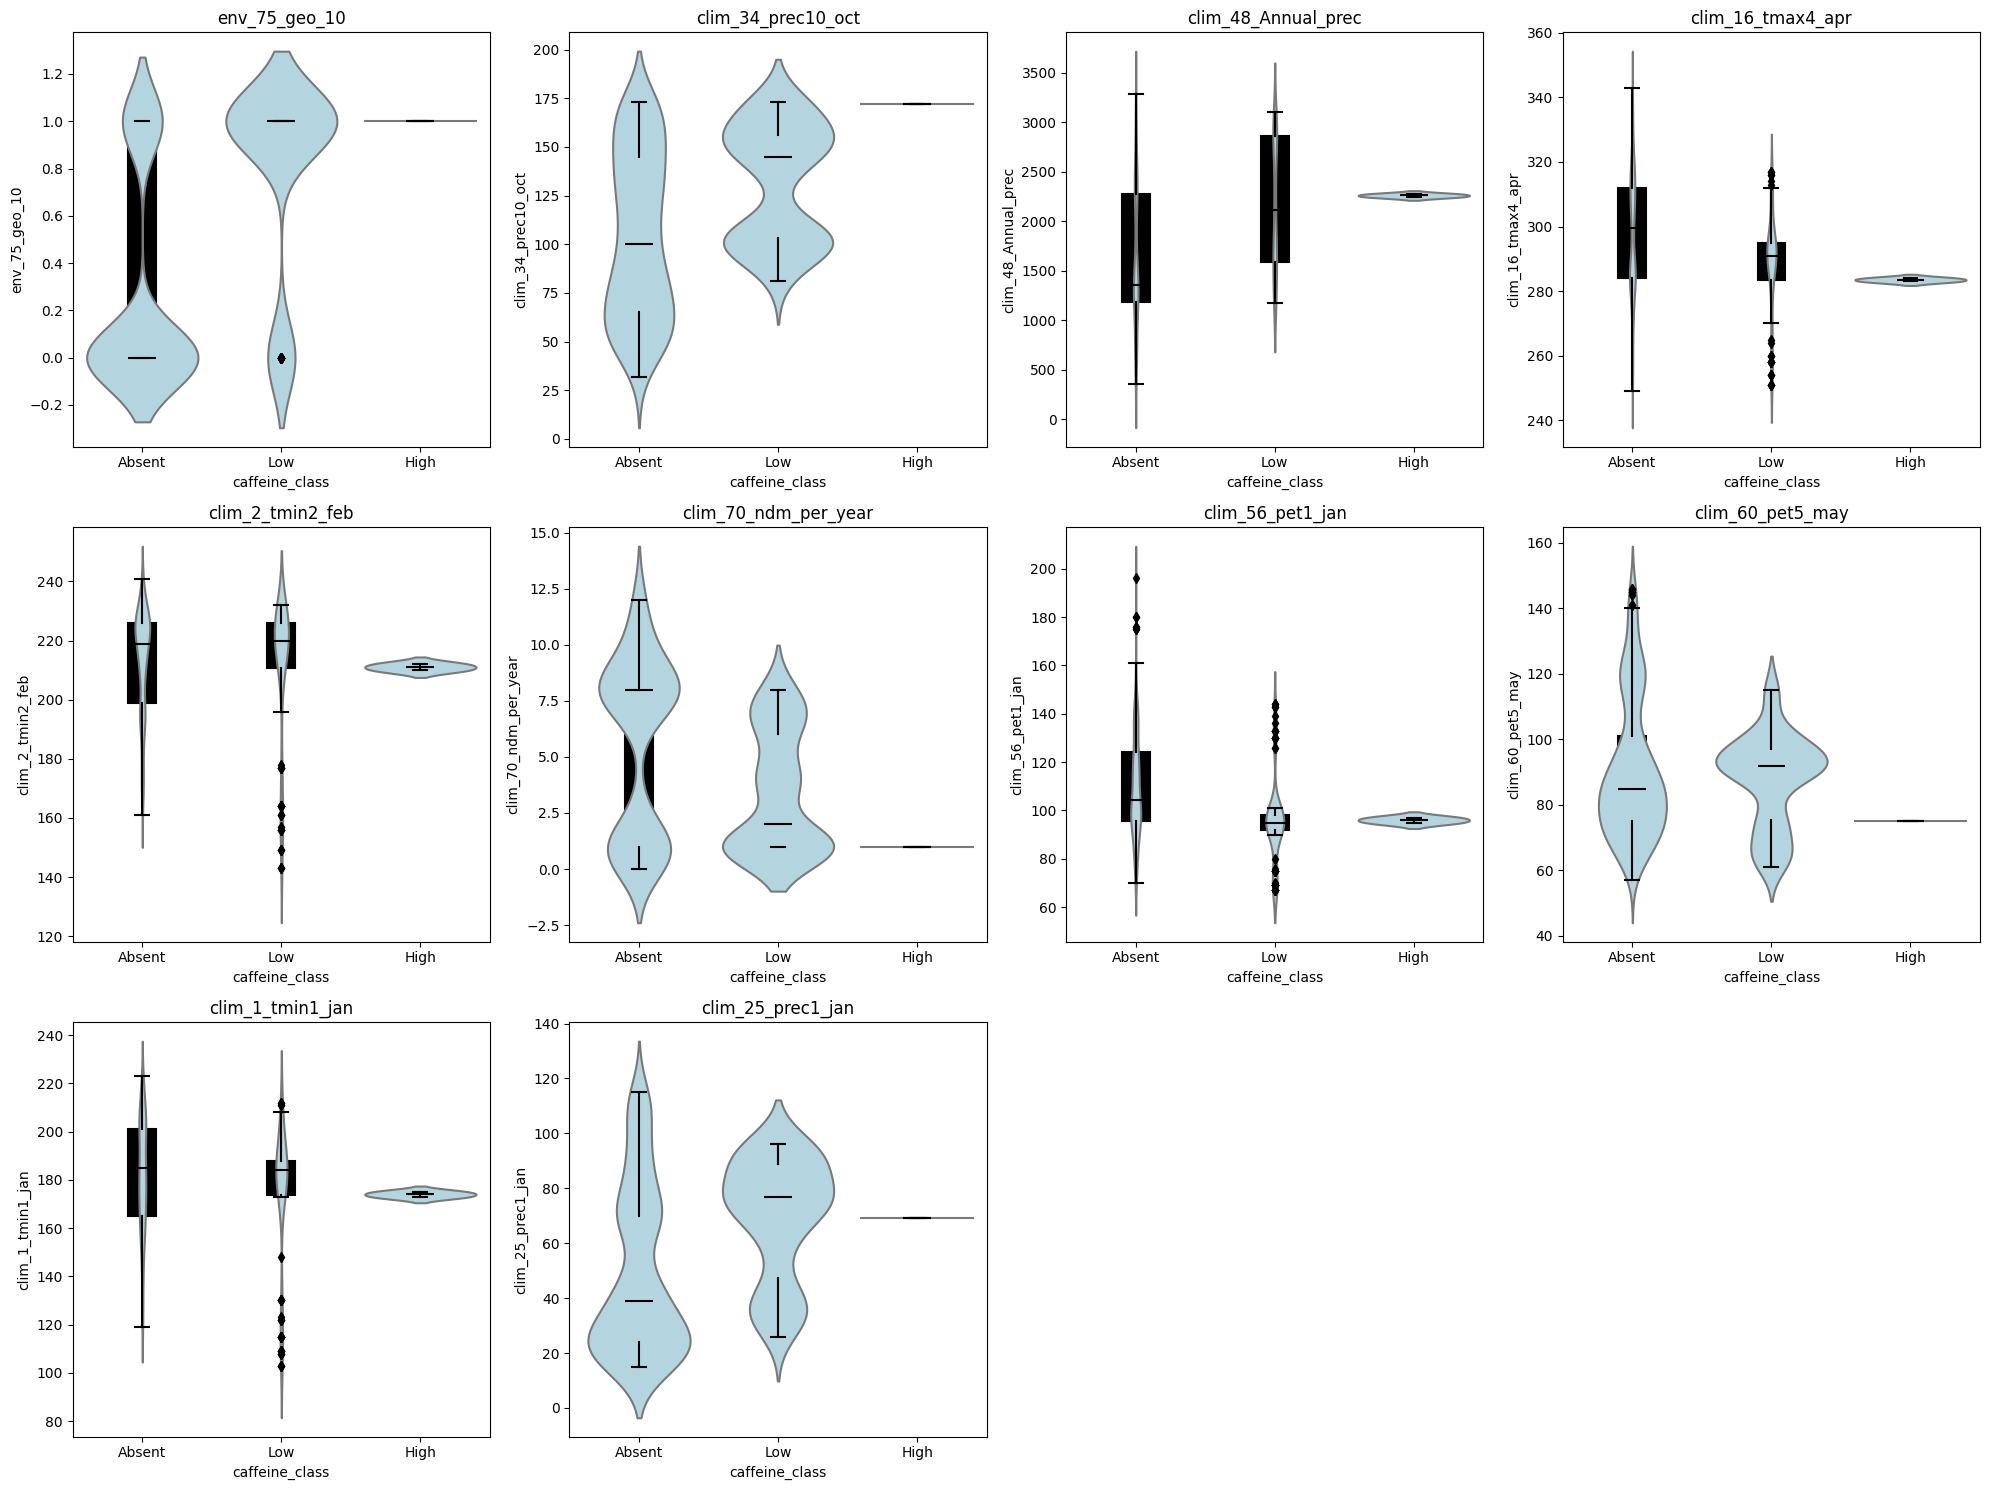

In [220]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

fig, axes = plt.subplots(3, 4, figsize=(20, 15))
axes = axes.flatten()  # Flatten the 3x4 grid for easy iteration

# Loop through the important features and plot in each subplot
for i, feature in enumerate(important_feature_names):
    # Violin plot
    sns.violinplot(x='caffeine_class', y=feature, data=coffee_data, ax=axes[i], inner=None, color="lightblue")
    
    # Boxplot overlaid on top of the violin plot
    sns.boxplot(x='caffeine_class', y=feature, data=coffee_data, ax=axes[i], whis=1.5, width=0.2, color='black')
    
    # Set the title for each subplot
    axes[i].set_title(f'{feature}')

# If there are extra subplots in the 3x4 grid, hide the empty ones
for j in range(len(important_feature_names), len(axes)):
    fig.delaxes(axes[j])  # Remove any unused axes

# Adjust the layout so subplots don't overlap
plt.tight_layout()

# Display the plot
plt.show()

In [179]:
# Select features with importance greater than a threshold
threshold = 0.10  # Adjust the threshold as needed
important_features_above_threshold = [feature for feature, importance in important_features if importance > threshold]

print("Features above threshold:", important_features_above_threshold)
important_features_above_threshold

Features above threshold: []


[]

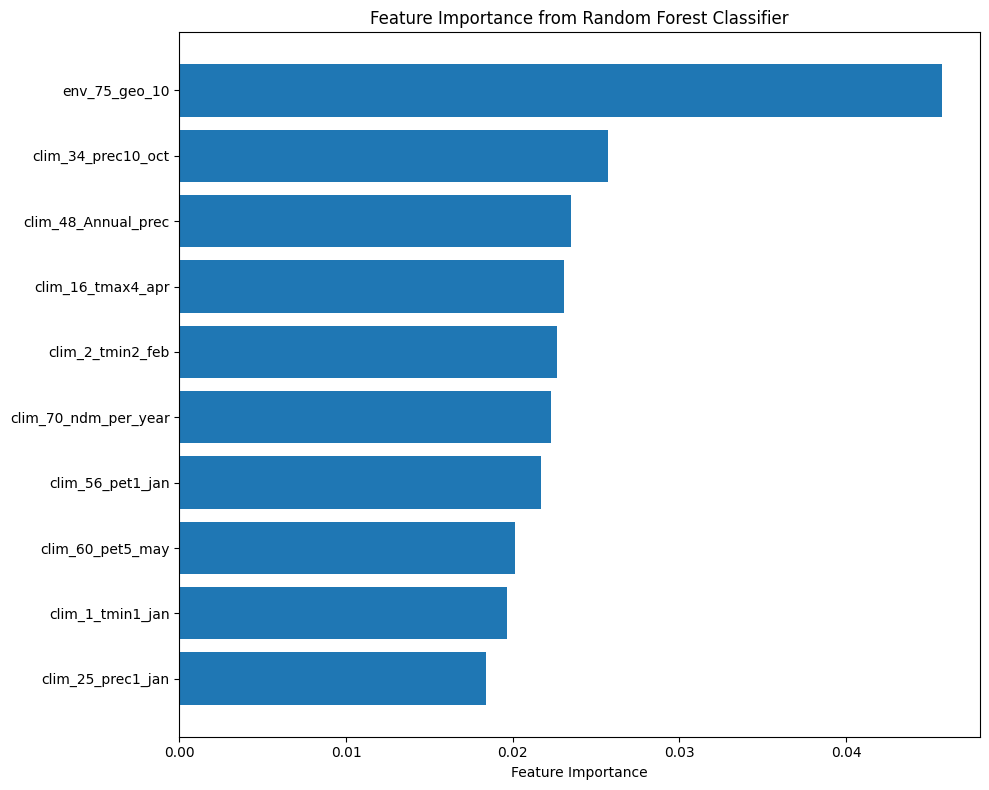

In [180]:
# Import libraries for plotting
import matplotlib.pyplot as plt
import numpy as np

# Extract the feature names and their importance scores
feature_names = [feature for feature, importance in important_features]
importances = [importance for feature, importance in important_features]

# Create a bar chart to visualize the feature importances
plt.figure(figsize=(10, 8))
plt.barh(np.arange(len(feature_names)), importances, align='center')
plt.yticks(np.arange(len(feature_names)), feature_names)
plt.xlabel('Feature Importance')
plt.title('Feature Importance from Random Forest Classifier')
plt.gca().invert_yaxis()  # To display the most important features at the top
plt.tight_layout()
plt.show()


Using entropy

In [181]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have a dataset 'coffee_data' with 'caffeine_class' as the target variable
# Split the dataset into features (X) and target variable (y)
X = coffee_data.drop(columns=['caffeine_class'])  # Features (remove the target)
y = coffee_data['caffeine_class']  # Target variable

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest Classifier using 'entropy' as the criterion
rf_classifier = RandomForestClassifier(n_estimators=100, criterion='entropy', random_state=42)

# Train the classifier
rf_classifier.fit(X_train, y_train)

# Get feature importance scores
feature_importances = rf_classifier.feature_importances_

# Create a dictionary to map feature names to their importance scores
feature_importance_dict = {feature: importance for feature, importance in zip(X.columns, feature_importances)}

# Sort the features by their importance
sorted_features = sorted(feature_importance_dict.items(), key=lambda item: item[1], reverse=True)

# Print the most informative features
print("Most Informative Features (based on entropy):")
for feature, importance in sorted_features:
    print(f"Feature: {feature}, Importance: {importance:.4f}")


Most Informative Features (based on entropy):
Feature: env_75_geo_10, Importance: 0.0395
Feature: clim_25_prec1_jan, Importance: 0.0272
Feature: clim_34_prec10_oct, Importance: 0.0263
Feature: clim_56_pet1_jan, Importance: 0.0224
Feature: clim_14_tmax2_feb, Importance: 0.0203
Feature: clim_1_tmin1_jan, Importance: 0.0186
Feature: clim_70_ndm_per_year, Importance: 0.0182
Feature: clim_55_prec_coldest_q, Importance: 0.0180
Feature: clim_27_prec3_mar, Importance: 0.0178
Feature: env_71_alt, Importance: 0.0175
Feature: clim_69_cwd_annual, Importance: 0.0175
Feature: clim_49_prec_wettest_m, Importance: 0.0169
Feature: clim_16_tmax4_apr, Importance: 0.0161
Feature: clim_48_Annual_prec, Importance: 0.0159
Feature: clim_7_tmin7_jul, Importance: 0.0157
Feature: clim_31_prec7_jul, Importance: 0.0156
Feature: clim_41_tmax_warmest_m, Importance: 0.0153
Feature: clim_36_prec12_dec, Importance: 0.0153
Feature: clim_2_tmin2_feb, Importance: 0.0150
Feature: clim_39_isotherm, Importance: 0.0149
Feature

In [182]:
from sklearn.model_selection import cross_val_score

# Evaluate the model using cross-validation (e.g., accuracy)
scores = cross_val_score(rf_classifier, X_train, y_train, cv=5, scoring='accuracy')
print("Cross-Validation Accuracy: ", scores.mean())


c:\Users\adm1\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_split.py:776: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


Cross-Validation Accuracy:  0.9087624209575429


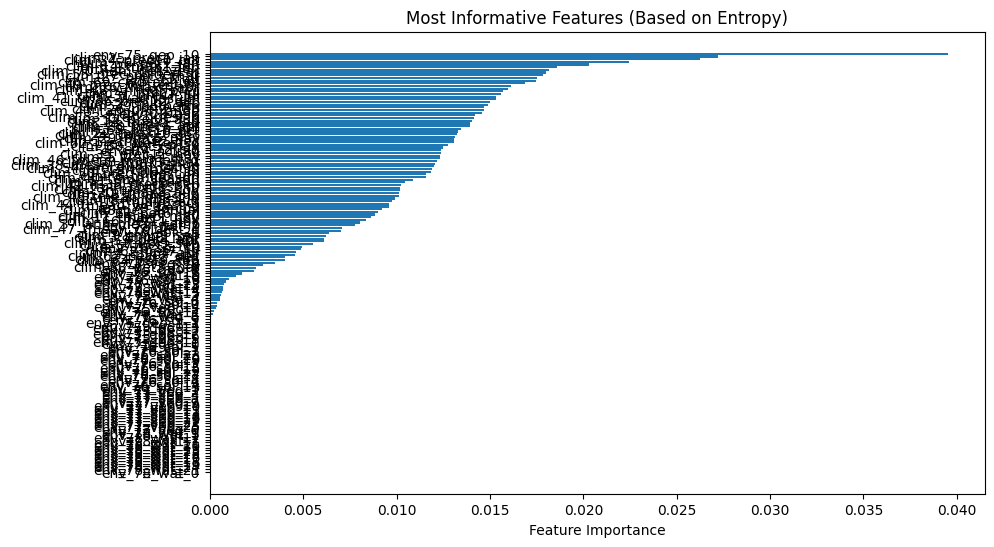

In [183]:
# Extract features and their importance for visualization
features = [feature for feature, importance in sorted_features]
importances = [importance for feature, importance in sorted_features]

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(features, importances, align='center')
plt.xlabel('Feature Importance')
plt.title('Most Informative Features (Based on Entropy)')
plt.gca().invert_yaxis()  # Invert y-axis to have the most important feature at the top
plt.show()


Since many of the features are highly correlated, the importance of the the features can dilute feature importance scores, causing important features to seem less significant. 

Removing one feature from each highly correlated pair can lead to clearer and more accurate feature importance ranking

We will retrain the model after removing correlated features which may give us a better idea of which features are genuinely important for predicting caffeine class

In [184]:
import pandas as pd
import numpy as np

# Set the correlation threshold
threshold = 0.99

# Calculate the correlation matrix
correlation_matrix = coffee_data.drop(columns=['caffeine_class']).corr().abs()  # abs() for absolute values

# Create an empty list to store correlated pairs
correlated_pairs = []

# Create a mask to look at only the upper triangle of the correlation matrix (to avoid duplicates)
upper_triangle = np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool)

# Iterate through the upper triangle and identify correlated pairs
for i in range(correlation_matrix.shape[0]):
    for j in range(i+1, correlation_matrix.shape[1]):
        if correlation_matrix.iloc[i, j] > threshold:
            feature1 = correlation_matrix.columns[i]
            feature2 = correlation_matrix.columns[j]
            correlated_pairs.append((feature1, feature2))

# Print the correlated pairs
print(correlated_pairs)
correlated_pairs


[('clim_1_tmin1_jan', 'clim_10_tmin10_oct'), ('clim_2_tmin2_feb', 'clim_11_tmin11_nov'), ('clim_2_tmin2_feb', 'clim_12_tmin12_dec'), ('clim_5_tmin5_may', 'clim_6_tmin6_jun'), ('clim_5_tmin5_may', 'clim_7_tmin7_jul'), ('clim_5_tmin5_may', 'clim_42_tmin_coldest_m'), ('clim_6_tmin6_jun', 'clim_7_tmin7_jul'), ('clim_6_tmin6_jun', 'clim_42_tmin_coldest_m'), ('clim_7_tmin7_jul', 'clim_42_tmin_coldest_m'), ('clim_13_tmax1_jan', 'clim_22_tmax10_oct'), ('clim_30_prec6_jun', 'clim_31_prec7_jul'), ('clim_32_prec8_aug', 'clim_53_prec_driest_q'), ('clim_33_prec9_sep', 'clim_53_prec_driest_q'), ('clim_44_tmean_wettest_q', 'clim_46_tmean_warmest_q'), ('clim_53_prec_driest_q', 'clim_55_prec_coldest_q'), ('env_77_veg_2', 'env_78_wat_9')]


[('clim_1_tmin1_jan', 'clim_10_tmin10_oct'),
 ('clim_2_tmin2_feb', 'clim_11_tmin11_nov'),
 ('clim_2_tmin2_feb', 'clim_12_tmin12_dec'),
 ('clim_5_tmin5_may', 'clim_6_tmin6_jun'),
 ('clim_5_tmin5_may', 'clim_7_tmin7_jul'),
 ('clim_5_tmin5_may', 'clim_42_tmin_coldest_m'),
 ('clim_6_tmin6_jun', 'clim_7_tmin7_jul'),
 ('clim_6_tmin6_jun', 'clim_42_tmin_coldest_m'),
 ('clim_7_tmin7_jul', 'clim_42_tmin_coldest_m'),
 ('clim_13_tmax1_jan', 'clim_22_tmax10_oct'),
 ('clim_30_prec6_jun', 'clim_31_prec7_jul'),
 ('clim_32_prec8_aug', 'clim_53_prec_driest_q'),
 ('clim_33_prec9_sep', 'clim_53_prec_driest_q'),
 ('clim_44_tmean_wettest_q', 'clim_46_tmean_warmest_q'),
 ('clim_53_prec_driest_q', 'clim_55_prec_coldest_q'),
 ('env_77_veg_2', 'env_78_wat_9')]

In [185]:
# Compare variance of correlated features
for feature1, feature2 in correlated_pairs:
    if coffee_data[feature1].var() > coffee_data[feature2].var():
        # Keep feature1, discard feature2
        print(f"Keeping {feature1}, discarding {feature2} (higher variance)")
    else:
        # Keep feature2, discard feature1
        print(f"Keeping {feature2}, discarding {feature1} (higher variance)")


Keeping clim_1_tmin1_jan, discarding clim_10_tmin10_oct (higher variance)
Keeping clim_11_tmin11_nov, discarding clim_2_tmin2_feb (higher variance)
Keeping clim_2_tmin2_feb, discarding clim_12_tmin12_dec (higher variance)
Keeping clim_6_tmin6_jun, discarding clim_5_tmin5_may (higher variance)
Keeping clim_5_tmin5_may, discarding clim_7_tmin7_jul (higher variance)
Keeping clim_5_tmin5_may, discarding clim_42_tmin_coldest_m (higher variance)
Keeping clim_6_tmin6_jun, discarding clim_7_tmin7_jul (higher variance)
Keeping clim_6_tmin6_jun, discarding clim_42_tmin_coldest_m (higher variance)
Keeping clim_7_tmin7_jul, discarding clim_42_tmin_coldest_m (higher variance)
Keeping clim_13_tmax1_jan, discarding clim_22_tmax10_oct (higher variance)
Keeping clim_30_prec6_jun, discarding clim_31_prec7_jul (higher variance)
Keeping clim_53_prec_driest_q, discarding clim_32_prec8_aug (higher variance)
Keeping clim_53_prec_driest_q, discarding clim_33_prec9_sep (higher variance)
Keeping clim_46_tmean_w

In [186]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calculate VIF for each feature
X = coffee_data.drop(columns=['caffeine_class'])  # Assuming caffeine_class is the target variable
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)


c:\Users\adm1\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
c:\Users\adm1\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\regression\linear_model.py:1782: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


                      feature           VIF
0            clim_1_tmin1_jan  3.343091e+04
1            clim_2_tmin2_feb  1.994420e+04
2            clim_3_tmin3_mar  2.133069e+04
3            clim_4_tmin4_apr  2.875983e+04
4            clim_5_tmin5_may  2.604307e+04
5            clim_6_tmin6_jun  2.302584e+04
6            clim_7_tmin7_jul  3.875722e+04
7            clim_8_tmin8_aug  3.826711e+04
8            clim_9_tmin9_sep  2.513027e+04
9          clim_10_tmin10_oct  1.627604e+04
10         clim_11_tmin11_nov  2.980850e+04
11         clim_12_tmin12_dec  1.418281e+04
12          clim_13_tmax1_jan  3.405372e+04
13          clim_14_tmax2_feb  1.188054e+04
14          clim_15_tmax3_mar  1.302191e+04
15          clim_16_tmax4_apr  1.348127e+04
16          clim_17_tmax5_may  1.164630e+04
17          clim_18_tmax6_jun  1.436153e+04
18          clim_19_tmax7_jul  3.116551e+04
19          clim_20_tmax8_aug  3.753181e+04
20          clim_21_tmax9_sep  2.373500e+04
21         clim_22_tmax10_oct  1

In [187]:
# Filter the vif_data DataFrame to show only rows where VIF is infinity (inf)
inf_vif_features = vif_data[vif_data['VIF'] == float('inf')]

# Display the features with VIF = inf
print(len(inf_vif_features))


77


c:\Users\adm1\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
c:\Users\adm1\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\regression\linear_model.py:1782: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


VIF Values:
                       Feature           VIF
0            clim_1_tmin1_jan  3.343091e+04
1            clim_2_tmin2_feb  1.994420e+04
2            clim_3_tmin3_mar  2.133069e+04
3            clim_4_tmin4_apr  2.875983e+04
4            clim_5_tmin5_may  2.604307e+04
5            clim_6_tmin6_jun  2.302584e+04
6            clim_7_tmin7_jul  3.875722e+04
7            clim_8_tmin8_aug  3.826711e+04
8            clim_9_tmin9_sep  2.513027e+04
9          clim_10_tmin10_oct  1.627604e+04
10         clim_11_tmin11_nov  2.980850e+04
11         clim_12_tmin12_dec  1.418281e+04
12          clim_13_tmax1_jan  3.405372e+04
13          clim_14_tmax2_feb  1.188054e+04
14          clim_15_tmax3_mar  1.302191e+04
15          clim_16_tmax4_apr  1.348127e+04
16          clim_17_tmax5_may  1.164630e+04
17          clim_18_tmax6_jun  1.436153e+04
18          clim_19_tmax7_jul  3.116551e+04
19          clim_20_tmax8_aug  3.753181e+04
20          clim_21_tmax9_sep  2.373500e+04
21         clim_22_

c:\Users\adm1\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


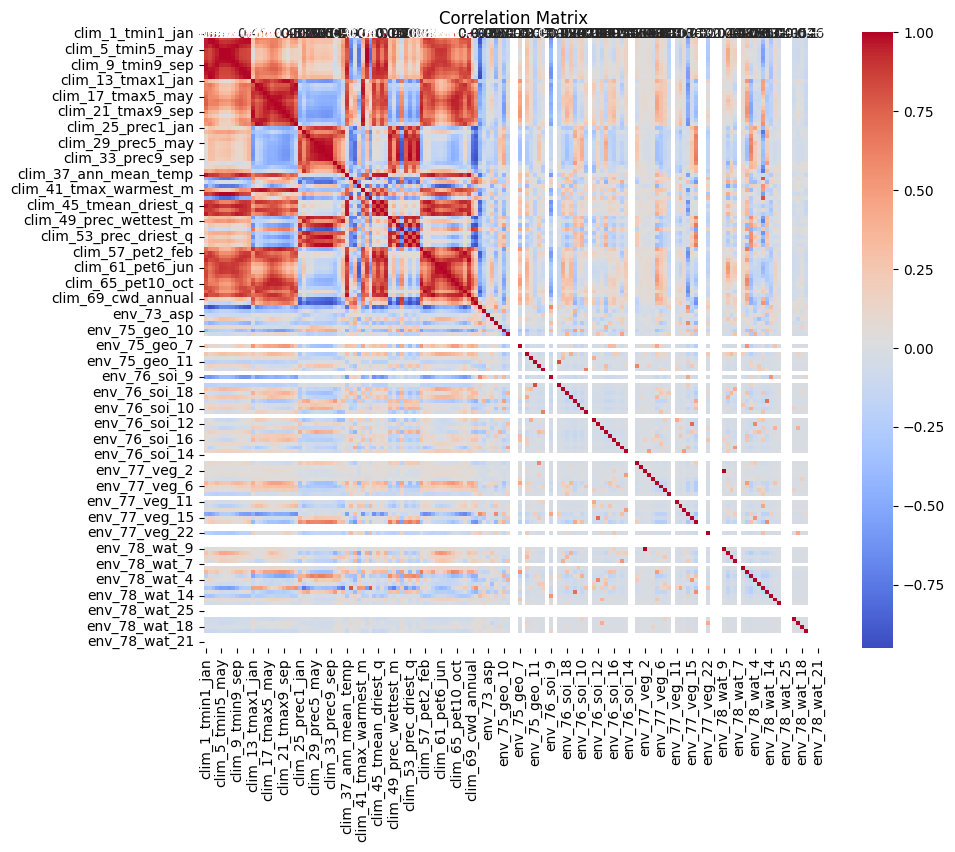

In [188]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame containing the predictor variables
X = coffee_data.drop(columns=['caffeine_class'])  # Assuming caffeine_class is the target variable

# Create a DataFrame to store VIF values
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns

# Calculate VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X, i) for i in range(X.shape[1])]

print("VIF Values:\n", vif_data)

# Calculate correlation matrix
corr_matrix = X.corr()

# Visualize correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


In [189]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler

# Assuming 'df' is your DataFrame containing the predictor variables
# You may need to standardize the data first
X = coffee_data.drop(columns=['caffeine_class'])  # Assuming caffeine_class is the target variable
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Create a DataFrame to store VIF values
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns

# Calculate VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X_scaled, i) for i in range(X_scaled.shape[1])]

print(vif_data)


c:\Users\adm1\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
c:\Users\adm1\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\regression\linear_model.py:1784: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss


                      Feature           VIF
0            clim_1_tmin1_jan  3.343091e+04
1            clim_2_tmin2_feb  1.994420e+04
2            clim_3_tmin3_mar  2.133069e+04
3            clim_4_tmin4_apr  2.875983e+04
4            clim_5_tmin5_may  2.604307e+04
5            clim_6_tmin6_jun  2.302584e+04
6            clim_7_tmin7_jul  3.875722e+04
7            clim_8_tmin8_aug  3.826711e+04
8            clim_9_tmin9_sep  2.513027e+04
9          clim_10_tmin10_oct  1.627604e+04
10         clim_11_tmin11_nov  2.980850e+04
11         clim_12_tmin12_dec  1.418281e+04
12          clim_13_tmax1_jan  3.405372e+04
13          clim_14_tmax2_feb  1.188054e+04
14          clim_15_tmax3_mar  1.302191e+04
15          clim_16_tmax4_apr  1.348127e+04
16          clim_17_tmax5_may  1.164630e+04
17          clim_18_tmax6_jun  1.436153e+04
18          clim_19_tmax7_jul  3.116551e+04
19          clim_20_tmax8_aug  3.753181e+04
20          clim_21_tmax9_sep  2.373500e+04
21         clim_22_tmax10_oct  1

Comparing with highly correlated features

In [207]:
import numpy as np

# Calculate the correlation matrix
correlation_matrix = coffee_data.drop(columns=['caffeine_class']).corr()

# Create a mask to get the upper triangle of the correlation matrix (to avoid duplicates)
upper_triangle = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))

# Find features with a correlation coefficient greater than 0.9
highly_correlated_features = [column for column in upper_triangle.columns if any(upper_triangle[column].abs() > 0.9)]

highly_correlated_features

['clim_2_tmin2_feb',
 'clim_3_tmin3_mar',
 'clim_4_tmin4_apr',
 'clim_5_tmin5_may',
 'clim_6_tmin6_jun',
 'clim_7_tmin7_jul',
 'clim_8_tmin8_aug',
 'clim_9_tmin9_sep',
 'clim_10_tmin10_oct',
 'clim_11_tmin11_nov',
 'clim_12_tmin12_dec',
 'clim_15_tmax3_mar',
 'clim_16_tmax4_apr',
 'clim_17_tmax5_may',
 'clim_18_tmax6_jun',
 'clim_19_tmax7_jul',
 'clim_20_tmax8_aug',
 'clim_21_tmax9_sep',
 'clim_22_tmax10_oct',
 'clim_23_tmax11_nov',
 'clim_24_tmax12_dec',
 'clim_29_prec5_may',
 'clim_30_prec6_jun',
 'clim_31_prec7_jul',
 'clim_32_prec8_aug',
 'clim_33_prec9_sep',
 'clim_36_prec12_dec',
 'clim_37_ann_mean_temp',
 'clim_41_tmax_warmest_m',
 'clim_42_tmin_coldest_m',
 'clim_43_tannual_range',
 'clim_44_tmean_wettest_q',
 'clim_45_tmean_driest_q',
 'clim_46_tmean_warmest_q',
 'clim_47_tmean_coldest_q',
 'clim_48_Annual_prec',
 'clim_49_prec_wettest_m',
 'clim_50_prec_driest_m',
 'clim_51_prec_season',
 'clim_52_prec_wettest_q',
 'clim_53_prec_driest_q',
 'clim_54_prec_warmest_q',
 'clim_55

In [208]:
len(highly_correlated_features)

61

In [209]:

reduced_data = coffee_data.drop(columns=highly_correlated_features)
reduced_data.to_csv(r'../data/reduced_data_bin.csv', index=False)
# Display the reduced dataset shape
print(f"Original dataset shape: {coffee_data.shape}")
print(f"Reduced dataset shape (after removing highly correlated features): {reduced_data.shape}")

Original dataset shape: (508, 159)
Reduced dataset shape (after removing highly correlated features): (508, 98)


Once highly correlated values have been removed we try reclassifying features

In [194]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Assuming 'caffeine_class' is your target variable and X contains the features
X = reduced_data.drop(columns=['caffeine_class']) 
y = reduced_data['caffeine_class']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)#criterion='entropy',
rf_classifier.fit(X_train, y_train)

# Get feature importance scores
feature_importances = rf_classifier.feature_importances_

# Pair feature names with their importance scores
features = X.columns
important_features = sorted(zip(features, feature_importances), key=lambda x: x[1], reverse=True)
feature_importance_dict = {feature: importance for feature, importance in zip(X.columns, feature_importances)}

# Display the most important features
for feature, importance in important_features:
    print(f"Feature: {feature}, Importance: {importance:.4f}")



Feature: env_75_geo_10, Importance: 0.0776
Feature: clim_25_prec1_jan, Importance: 0.0666
Feature: clim_40_temp_season, Importance: 0.0555
Feature: clim_27_prec3_mar, Importance: 0.0552
Feature: clim_34_prec10_oct, Importance: 0.0550
Feature: clim_26_prec2_feb, Importance: 0.0547
Feature: clim_69_cwd_annual, Importance: 0.0537
Feature: clim_14_tmax2_feb, Importance: 0.0533
Feature: clim_28_prec4_apr, Importance: 0.0474
Feature: clim_13_tmax1_jan, Importance: 0.0454
Feature: clim_1_tmin1_jan, Importance: 0.0444
Feature: clim_35_prec11_nov, Importance: 0.0407
Feature: clim_38_mean_diurn_range, Importance: 0.0362
Feature: env_74_solrad, Importance: 0.0355
Feature: clim_39_isotherm, Importance: 0.0342
Feature: env_72_slo, Importance: 0.0283
Feature: env_78_wat_2, Importance: 0.0263
Feature: env_79_forcov, Importance: 0.0252
Feature: env_73_asp, Importance: 0.0236
Feature: env_76_soi_10, Importance: 0.0218
Feature: env_77_veg_16, Importance: 0.0188
Feature: env_76_soi_9, Importance: 0.0108


In [195]:
# Calculate the correlation matrix
correlation_matrix = reduced_data.drop(columns=['caffeine_class']).corr()

# Create a mask to get the upper triangle of the correlation matrix (to avoid duplicates)
upper_triangle = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))

# Find features with a correlation coefficient greater than 0.9
highly_correlated_features = [column for column in upper_triangle.columns if any(upper_triangle[column].abs() > 0.9)]

highly_correlated_features

[]

In [196]:
from sklearn.model_selection import cross_val_score

# Evaluate the model using cross-validation (e.g., accuracy)
scores = cross_val_score(rf_classifier, X_train, y_train, cv=5, scoring='accuracy')
print("Cross-Validation Accuracy: ", scores.mean())


c:\Users\adm1\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_split.py:776: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


Cross-Validation Accuracy:  0.9211080999698886


c:\Users\adm1\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\adm1\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\adm1\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\adm1\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: us

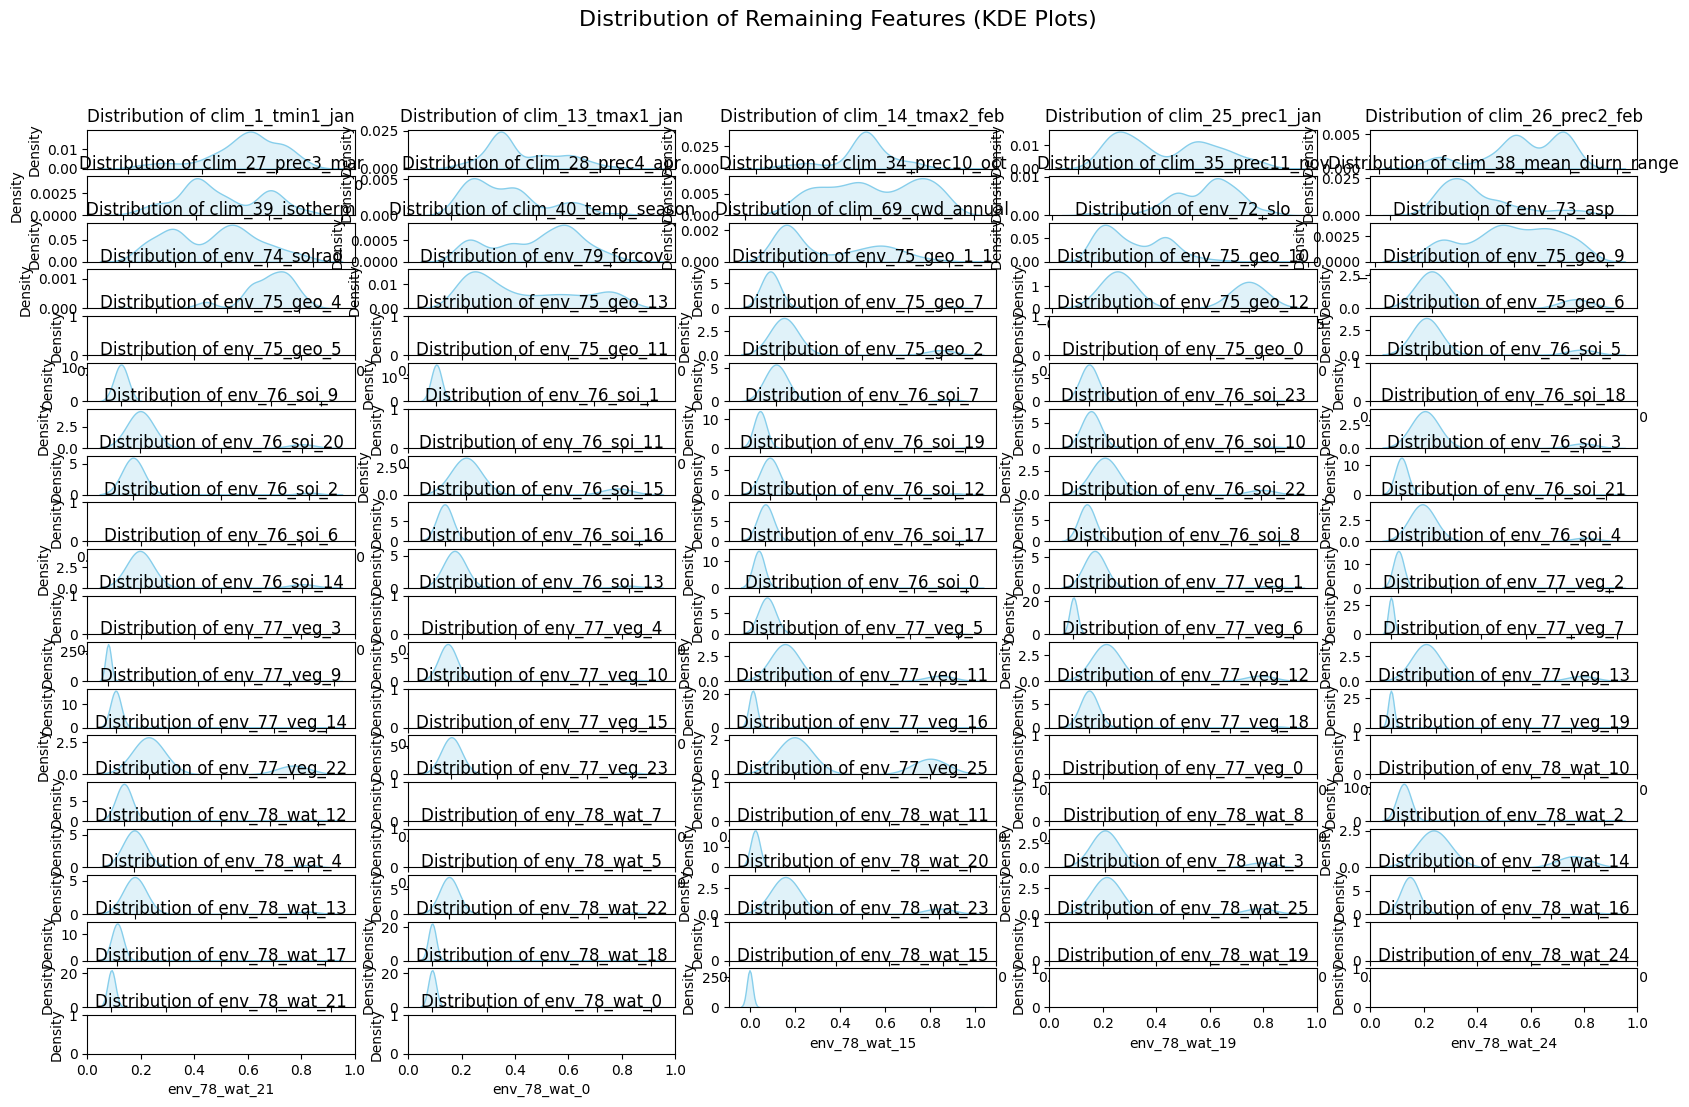

In [201]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'reduced_data' contains the 13 remaining attributes

X_data = reduced_data.drop(columns=['caffeine_class'])
# List of remaining features
remaining_features = X_data.columns  # Adjust if needed

# Create a 3x5 subplot layout (to accommodate 13 features)
rows = 20
cols = 5
fig, axes = plt.subplots(rows, cols, figsize=(20, 12))
fig.suptitle('Distribution of Remaining Features (KDE Plots)', fontsize=16)

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Plot each feature in the corresponding subplot
for i, feature in enumerate(remaining_features):
    sns.kdeplot(data=reduced_data[feature], ax=axes[i], fill=True, color='skyblue')
    axes[i].set_title(f'Distribution of {feature}')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Density')

# Remove unused subplots if there are fewer features than subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])  # Delete unused axes

#plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust layout to fit the title
plt.show()


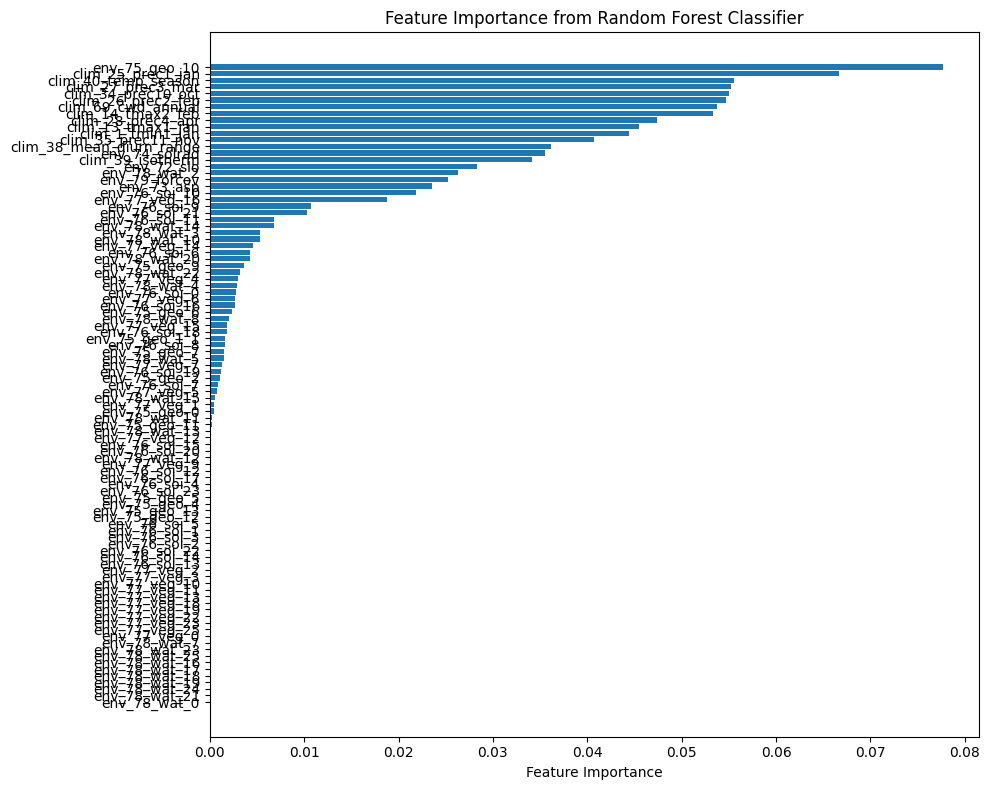

In [202]:
# Import libraries for plotting
import matplotlib.pyplot as plt
import numpy as np

# Extract the feature names and their importance scores
feature_names = [feature for feature, importance in important_features]
importances = [importance for feature, importance in important_features]

# Create a bar chart to visualize the feature importances
plt.figure(figsize=(10, 8))
plt.barh(np.arange(len(feature_names)), importances, align='center')
plt.yticks(np.arange(len(feature_names)), feature_names)
plt.xlabel('Feature Importance')
plt.title('Feature Importance from Random Forest Classifier')
plt.gca().invert_yaxis()  # To display the most important features at the top
plt.tight_layout()
plt.show()

c:\Users\adm1\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_split.py:776: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


Cross-Validation Scores:  [0.89156627 0.93975904 0.91463415 0.96341463 0.91463415]
Mean Accuracy:  0.9248016456068175
Standard Deviation of Accuracy:  0.024600947210829966


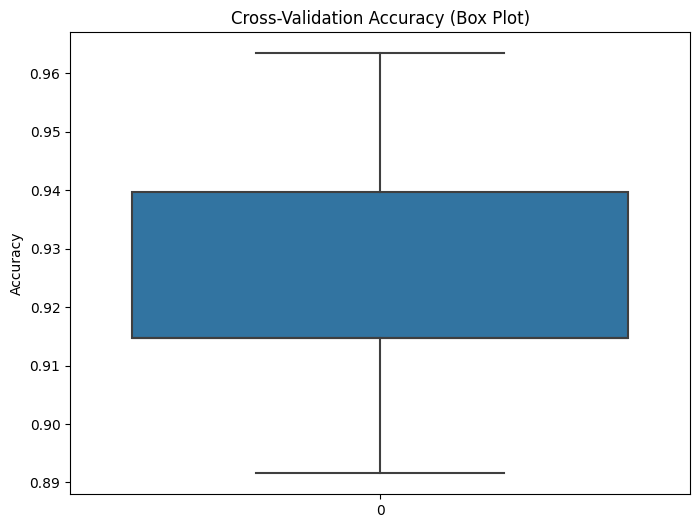

c:\Users\adm1\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


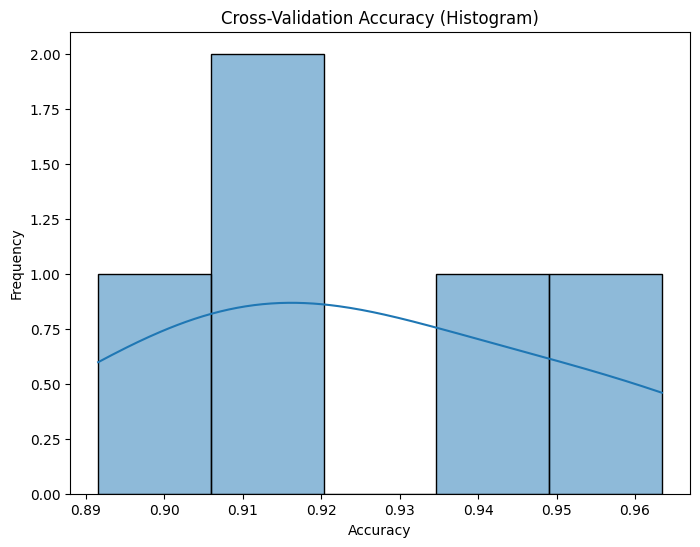

In [124]:
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'rf_classifier' is your trained RandomForestClassifier
# and 'X_train' and 'y_train' are your feature and target datasets

# Run cross-validation to compute accuracy for each fold
cv_scores = cross_val_score(rf_classifier, X_train, y_train, cv=5, scoring='accuracy')

# Print the cross-validation scores
print("Cross-Validation Scores: ", cv_scores)
print("Mean Accuracy: ", cv_scores.mean())
print("Standard Deviation of Accuracy: ", cv_scores.std())

# Visualization 1: Box Plot of Cross-Validation Scores
plt.figure(figsize=(8, 6))
sns.boxplot(data=cv_scores)
plt.title('Cross-Validation Accuracy (Box Plot)')
plt.ylabel('Accuracy')
plt.show()

# Visualization 2: Histogram of Cross-Validation Scores
plt.figure(figsize=(8, 6))
sns.histplot(cv_scores, bins=5, kde=True)
plt.title('Cross-Validation Accuracy (Histogram)')
plt.xlabel('Accuracy')
plt.ylabel('Frequency')
plt.show()


In [125]:
# Run cross-validation to compute accuracy for each fold
cv_scores = cross_val_score(rf_classifier, X_train, y_train, cv=5, scoring='accuracy')

print("Cross-Validation Accuracy Scores: ", cv_scores)


c:\Users\adm1\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_split.py:776: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


Cross-Validation Accuracy Scores:  [0.89156627 0.93975904 0.91463415 0.96341463 0.91463415]


In [126]:
from sklearn.model_selection import cross_val_score

# Use F1 score for multiclass classification (with weighted average)
cv_f1_scores = cross_val_score(rf_classifier, X_train, y_train, cv=5, scoring='f1_weighted')

print("Cross-Validation F1 Scores (weighted): ", cv_f1_scores)
print("Mean F1 Score: ", cv_f1_scores.mean())


c:\Users\adm1\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_split.py:776: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


Cross-Validation F1 Scores (weighted):  [0.88289157 0.93398387 0.91404432 0.96316185 0.91116399]
Mean F1 Score:  0.9210491184670271


In [127]:
# Use precision score for multiclass classification (with macro average)
cv_precision_scores = cross_val_score(rf_classifier, X_train, y_train, cv=5, scoring='precision_macro')

# Use recall score for multiclass classification (with macro average)
cv_recall_scores = cross_val_score(rf_classifier, X_train, y_train, cv=5, scoring='recall_macro')

print("Cross-Validation Precision Scores (macro): ", cv_precision_scores)
print("Cross-Validation Recall Scores (macro): ", cv_recall_scores)


c:\Users\adm1\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_split.py:776: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(
c:\Users\adm1\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\adm1\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\adm1\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn

Cross-Validation Precision Scores (macro):  [0.59373219 0.61997019 0.89848485 0.96060606 0.92534722]
Cross-Validation Recall Scores (macro):  [0.56464646 0.62525253 0.88761975 0.94804716 0.86109064]
